<a href="https://colab.research.google.com/github/datawilly/best_streaming_service/blob/main/Best_Streaming_Service_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import plotly
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Streaming Platforms/tv_shows.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5611 entries, 0 to 5610
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       5611 non-null   int64  
 1   Title            5611 non-null   object 
 2   Year             5611 non-null   int64  
 3   Age              3165 non-null   object 
 4   IMDb             4450 non-null   float64
 5   Rotten Tomatoes  1011 non-null   object 
 6   Netflix          5611 non-null   int64  
 7   Hulu             5611 non-null   int64  
 8   Prime Video      5611 non-null   int64  
 9   Disney+          5611 non-null   int64  
 10  type             5611 non-null   int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 482.3+ KB


In [4]:
df.drop_duplicates('Title',keep='first', inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5564 entries, 0 to 5610
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       5564 non-null   int64  
 1   Title            5564 non-null   object 
 2   Year             5564 non-null   int64  
 3   Age              3137 non-null   object 
 4   IMDb             4408 non-null   float64
 5   Rotten Tomatoes  1004 non-null   object 
 6   Netflix          5564 non-null   int64  
 7   Hulu             5564 non-null   int64  
 8   Prime Video      5564 non-null   int64  
 9   Disney+          5564 non-null   int64  
 10  type             5564 non-null   int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 521.6+ KB


In [6]:
df['Rotten Tomatoes'] = df['Rotten Tomatoes'].fillna('0%')
df['Rotten Tomatoes'] = df['Rotten Tomatoes'].apply(lambda x : x.rstrip('%'))
df['Rotten Tomatoes'] = pd.to_numeric(df['Rotten Tomatoes'])

df['IMDb'] = df['IMDb'].fillna(0)
df['IMDb'] = df['IMDb']*10
df['IMDb'] = df['IMDb'].astype('int')

In [7]:
df_long=pd.melt(df[['Title','Netflix','Hulu','Disney+',
                                'Prime Video']],id_vars=['Title'],
                      var_name='StreamingOn', value_name='Present')
df_long = df_long[df_long['Present'] == 1]
df_long.drop(columns=['Present'],inplace=True)

In [8]:
df_combined = df_long.merge(df, on='Title', how='inner')
df_combined.drop(columns = ['Unnamed: 0','Netflix',
                                  'Hulu', 'Prime Video', 'Disney+', 'type'], inplace=True)

<Axes: xlabel='StreamingOn'>

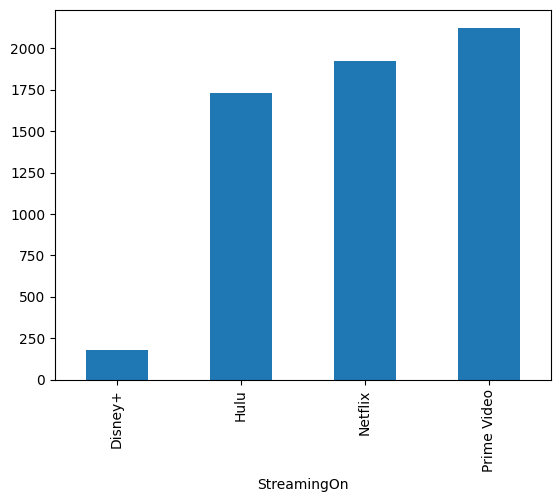

In [9]:
df_both_ratings = df_combined[(df_combined.IMDb > 0) & df_combined['Rotten Tomatoes'] > 0]
df_combined.groupby('StreamingOn').Title.count().plot(kind='bar')

In [10]:
figure = []
figure.append(px.violin(df_both_ratings, x = 'StreamingOn', y = 'IMDb', color='StreamingOn'))
figure.append(px.violin(df_both_ratings, x = 'StreamingOn', y = 'Rotten Tomatoes', color='StreamingOn'))
fig = make_subplots(rows=2, cols=4, shared_yaxes=True)

for i in range(2):
    for j in range(4):
        fig.add_trace(figure[i]['data'][j], row=i+1, col=j+1)

fig.update_layout(autosize=False, width=800, height=800)
fig.show()

In [11]:
px.scatter(df_both_ratings, x='IMDb',
           y='Rotten Tomatoes',color='StreamingOn')